In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA

In [2]:
products = pd.read_parquet('products.parquet')
returns = pd.read_parquet('returns.parquet')
reviews = pd.read_parquet('reviews.parquet')
test = pd.read_parquet('test.parquet')
return_reasons = pd.read_parquet('return_reasons.parquet')

In [3]:
test.head(10)

,id,order_item_id,product_id,customer_id,purchase_price
0,3821007,25924705,c6e37feeae4ffb32c596278be5803dfbb2cae811a49f0a...,470a3be7a2064ccf6a2af3aa143422f8d73ac00ad8260e...,39000
1,3821335,26389794,104b05b6121c26b6376a7c78cfd904c33a5eea1107c71b...,91b874267fc80a4340b005cae70a9d7acd91e69dba7247...,87000
2,3821336,26389795,280443845f883cb83da5f4d5a6d838ed00ade8bd4b0685...,91b874267fc80a4340b005cae70a9d7acd91e69dba7247...,84000
3,3821337,26389792,84e5505da2298dafaeaafe7208cb51934c89bdac7dbae2...,91b874267fc80a4340b005cae70a9d7acd91e69dba7247...,158000
4,3821727,26549302,ddb80318c47647c6965ff30536323cfb2366ef63a4741b...,9862a7d705cf00508b564544b2ecd727c1d87b0cea704f...,239000
5,3821740,26450150,41c395097e6e5e4030a6566077e2819568dbf6dc75a3c6...,f552218f85a1167002b87e894e27ce26c1f3346d7bfc2c...,150000
6,3821741,26482343,6e6289f014f441d8258cbb1c7c2d2430cd60ae65059b36...,ce52624d54696c7e4827f195d940ba24ef518a0778557a...,355000
7,3821750,15468637,b067741cf15ff08ffb226478204369720884d95704b1e2...,d46644fcdc01d1f0c949f6e8faa82c4b6c2587c7a983e2...,215000
8,3821873,26328199,2d655ec607da015e7a3f9510f29cb00a9aec412caaf606...,8b75b156e6e0183856cc49ea2cba85960a1a7826aea469...,150000
9,3821913,26496382,0a4dad35b75b8292b8ef95f5b6ee6513ad0b67e8093643...,f51b9a7fd3a2f14d8a7fae73d88916d6bce89d2e761e4a...,162000


In [4]:
products.head()

,product_id,category_id,category_title,product_description
0,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,11e8a99b4c0365cebe27119acceed979ac36829490f239...,Крышки,None
1,c6f3ac57944a531490cd39902d0f777715fd005efac9a3...,0588f1e6722b3743f34a85fa93d75a85d024f425feca15...,"Кастрюли, ковши",None
2,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...,18c1e67c850703071585ed2f4796bf8a0b42601b891ed0...,Термосы,None
3,7a61b53701befdae0eeeffaecc73f14e20b537bb0f8b91...,7f72bf3dd662213fa8fbeb0c15f241fde2e5477a22762d...,Розетки и креманки,None
4,31489056e0916d59fe3add79e63f095af3ffb81604691f...,57a89c11968eb79532b49ad45ab2641f2024fbd097a2c6...,Сковороды,None


In [5]:
returns.head()

,id,product_id,cause,comment,date_created,order_item_id,customer_id,purchase_price
index,,,,,,,,
0,69138,6a1a7601fac958ee967c73fe19315db8f6cdc3f1cd8370...,DEFECTED,брак,2023-01-02 05:37:33.846,588140,b4465ede5691891836ccc432bb8c49e1537b1d0a74f721...,106000
1,69148,7cab221310edf5f3c75fc38259bcb7640d080b4b05d5bb...,PHOTO_MISMATCH,думала больше,2023-01-02 05:44:34.432,773695,9bf74458174dd9c039ee6317fd48b356e8fc146f23c60b...,23000
2,69154,728611508a21a9214f2c8cc076d21e30046ec5c59bf359...,DEFECTED,брак,2023-01-02 05:45:31.277,695067,0a185871d03ee346b71b657d3fbaebfc35823fec2861f7...,390000
3,69161,f4f4031321f9b7cf1175fc6d363769297334ddd76aa2eb...,WRONG_ITEM,не тот товар,2023-01-02 05:57:35.652,635687,1123ce2b71eb64c572e6de0e14a723c17a55f67748327d...,71000
4,69165,c8f3f349fa927aae5fc954c5268b578b9916a908bb1f8a...,DEFECTED,не включается и не работает,2023-01-02 05:59:34.447,764986,95cd02979c6f97dc58590f7c0e6c421d7c3db2b9e7212b...,84000


In [6]:
reviews.head()

,order_item_id,product_id,customer_id,review_text,shop_id,rating,date_created
0,19068657,641695ab1f06465947d1e4e26f61ed308145dce718d9b6...,0aaefdb4bd01799d678f7fcd453e23c597804eb006f1ce...,товар потерян,c2f61742e5f0ef0a74c5fcbeff7ff659def91bf4b5f1e1...,1,2023-10-17 17:26:42.874
1,11130626,2c0818e03896a3e27fd8ec01ba9d7ae80d97673575a847...,851513a761b89239303515254d0e9c22a8474dd2df60b8...,,757db91a80964d58a2b0d26bffd641bcbe142aae4f7f47...,5,2023-07-27 10:06:40.711
2,8992153,d00a0a981e5618c4f96802e79c205ef2175b141edff368...,96659e77ab5e9b52ecbf110eed661c3fe742fc42443d50...,,8f0f97e140e126a4404a09eb1e14a53b7c742701c4290a...,5,2023-07-03 14:47:59.316
3,11078898,d0d9bad11fa6fedcf5c699055137a36f4c4c81d722b5fd...,321667e5d0ada2fa7f2356076f88a3848e596cde7bd120...,"Rahmat, juda yoqdi!",61182f39851829ca78c919a83ecbfa045fc0686bff16d0...,5,2023-07-30 12:26:59.864
4,32080499,4edd99b2e2a203a18cf24b6a2b134833ef1f74cf1940c0...,d67c451b69c7f706cedf6d4a87f1180ea62acd57c94a29...,16гб работает хорошо,02cca3803b564ede11ccf9f303c9910b39c532061e7a8c...,5,2024-01-19 06:02:57.971


In [7]:
products.category_title.nunique()

4007

In [8]:
reviews.head()

,order_item_id,product_id,customer_id,review_text,shop_id,rating,date_created
0,19068657,641695ab1f06465947d1e4e26f61ed308145dce718d9b6...,0aaefdb4bd01799d678f7fcd453e23c597804eb006f1ce...,товар потерян,c2f61742e5f0ef0a74c5fcbeff7ff659def91bf4b5f1e1...,1,2023-10-17 17:26:42.874
1,11130626,2c0818e03896a3e27fd8ec01ba9d7ae80d97673575a847...,851513a761b89239303515254d0e9c22a8474dd2df60b8...,,757db91a80964d58a2b0d26bffd641bcbe142aae4f7f47...,5,2023-07-27 10:06:40.711
2,8992153,d00a0a981e5618c4f96802e79c205ef2175b141edff368...,96659e77ab5e9b52ecbf110eed661c3fe742fc42443d50...,,8f0f97e140e126a4404a09eb1e14a53b7c742701c4290a...,5,2023-07-03 14:47:59.316
3,11078898,d0d9bad11fa6fedcf5c699055137a36f4c4c81d722b5fd...,321667e5d0ada2fa7f2356076f88a3848e596cde7bd120...,"Rahmat, juda yoqdi!",61182f39851829ca78c919a83ecbfa045fc0686bff16d0...,5,2023-07-30 12:26:59.864
4,32080499,4edd99b2e2a203a18cf24b6a2b134833ef1f74cf1940c0...,d67c451b69c7f706cedf6d4a87f1180ea62acd57c94a29...,16гб работает хорошо,02cca3803b564ede11ccf9f303c9910b39c532061e7a8c...,5,2024-01-19 06:02:57.971


In [9]:
print("Products Dataset Info:")
print(products.info())
print("\nReturns Dataset Info:")
print(returns.info())
print("\nReviews Dataset Info:")
print(reviews.info())
print("\nReturn Reasons Dataset Info:")
print(return_reasons.info())
print("\nTest Dataset Info:")
print(test.info())

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113713 entries, 0 to 113712
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   product_id           113713 non-null  object
 1   category_id          113713 non-null  object
 2   category_title       113713 non-null  object
 3   product_description  96015 non-null   object
dtypes: object(4)
memory usage: 3.5+ MB
None

Returns Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 282141 entries, 0 to 282140
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              282141 non-null  int64         
 1   product_id      282141 non-null  object        
 2   cause           282141 non-null  object        
 3   comment         282141 non-null  object        
 4   date_created    282141 non-null  datetime64[ns]
 5   order_item_id   28

In [10]:
# Check for missing values
print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())
print("\nMissing Values in Returns Dataset:")
print(returns.isnull().sum())
print("\nMissing Values in Reviews Dataset:")
print(reviews.isnull().sum())
print("\nMissing Values in Return Reasons Dataset:")
print(return_reasons.isnull().sum())
print("\nMissing Values in Test Dataset:")
print(test.isnull().sum())


Missing Values in Products Dataset:
product_id                 0
category_id                0
category_title             0
product_description    17698
dtype: int64

Missing Values in Returns Dataset:
id                0
product_id        0
cause             0
comment           0
date_created      0
order_item_id     0
customer_id       0
purchase_price    0
dtype: int64

Missing Values in Reviews Dataset:
order_item_id    0
product_id       0
customer_id      0
review_text      1
shop_id          0
rating           0
date_created     0
dtype: int64

Missing Values in Return Reasons Dataset:
id        0
reason    0
dtype: int64

Missing Values in Test Dataset:
id                0
order_item_id     0
product_id        0
customer_id       0
purchase_price    0
dtype: int64


In [11]:
print("\nSummary Statistics for Returns Dataset:")
print(returns.describe())
print("\nSummary Statistics for Reviews Dataset:")
print(reviews.describe())
print("\nSummary Statistics for Test Dataset:")
print(test.describe())


Summary Statistics for Returns Dataset:
                 id                   date_created  order_item_id  \
count  2.821410e+05                         282141   2.821410e+05   
mean   1.771597e+06  2023-08-06 00:17:44.798731264   1.308551e+07   
min    6.913800e+04     2023-01-02 05:37:33.846000   4.113600e+04   
25%    7.955010e+05  2023-06-06 13:48:55.624999936   6.784127e+06   
50%    1.705829e+06  2023-08-18 12:01:49.761999872   1.296604e+07   
75%    2.660751e+06  2023-10-15 14:21:27.465999872   1.912008e+07   
max    3.819468e+06     2023-12-09 22:03:27.609000   2.660822e+07   
std    1.086603e+06                            NaN   7.250281e+06   

       purchase_price  
count    2.821410e+05  
mean     1.399109e+05  
min      1.000000e+03  
25%      3.500000e+04  
50%      7.900000e+04  
75%      1.620000e+05  
max      1.399900e+07  
std      2.707904e+05  

Summary Statistics for Reviews Dataset:
       order_item_id        rating                   date_created
count   1.5028

C:\Users\ALTECHUZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


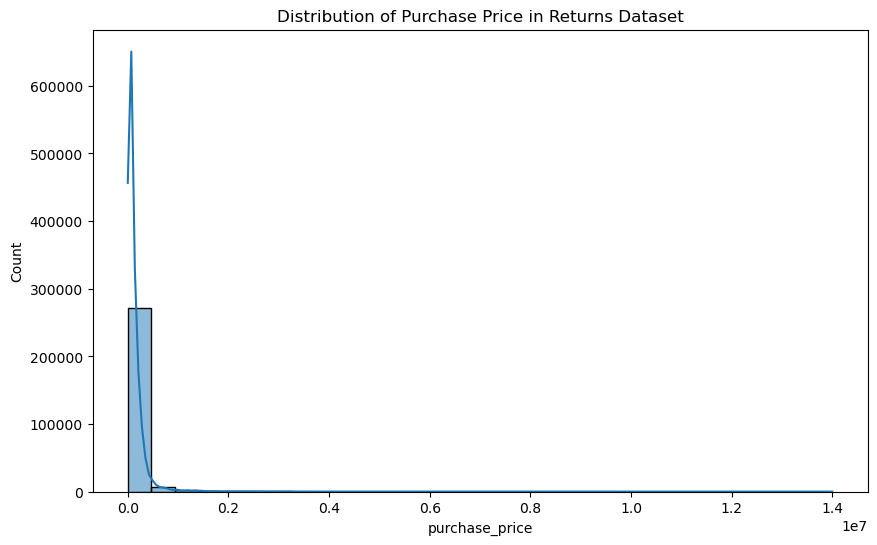

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(returns['purchase_price'], bins=30, kde=True)
plt.title('Distribution of Purchase Price in Returns Dataset')
plt.show()

C:\Users\ALTECHUZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


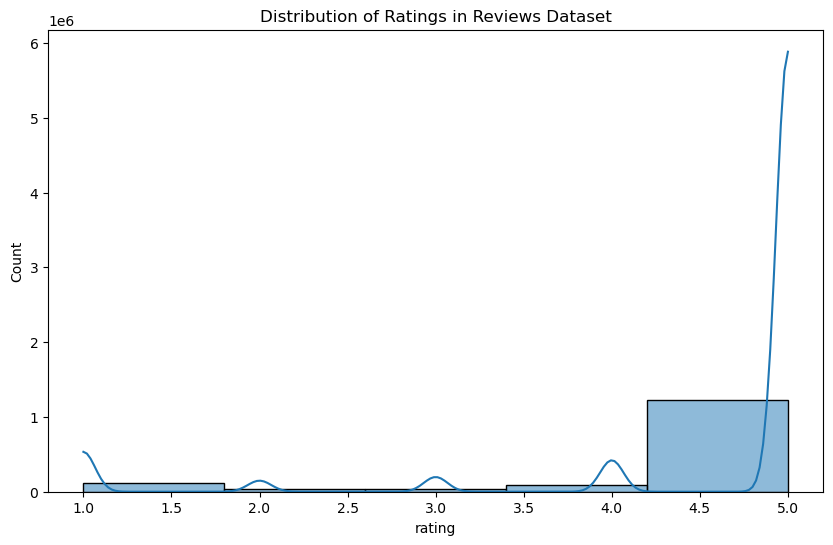

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(reviews['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings in Reviews Dataset')
plt.show()

In [14]:
products_cleaned = products.dropna(subset=['product_description'])

In [15]:
products_cleaned.isnull().sum()

product_id             0
category_id            0
category_title         0
product_description    0
dtype: int64

In [16]:
merged_data = pd.merge(returns, products_cleaned, on='product_id', how='left')

In [17]:
merged_data = pd.merge(merged_data, reviews, on=['product_id', 'order_item_id', 'customer_id'], how='left')

In [18]:
reason_mapping = dict(zip(return_reasons['reason'], return_reasons['id']))

In [19]:
returns['cause'] = returns['cause'].map(reason_mapping)

In [20]:
merged_data = pd.merge(returns, products_cleaned, on='product_id', how='left')

In [21]:
merged_data = pd.merge(merged_data, reviews, on=['product_id', 'order_item_id', 'customer_id'], how='left')

In [22]:
merged_data = pd.merge(merged_data, return_reasons, left_on='cause', right_on='id', how='left')

In [23]:
merged_data['product_description_length'] = merged_data['product_description'].apply(lambda x: len(x) if isinstance(x, str) else 0)

In [24]:
# Create a new feature for the average rating of the product
average_rating = reviews.groupby('product_id')['rating'].mean().reset_index().rename(columns={'rating': 'average_rating'})
merged_data = pd.merge(merged_data, average_rating, on='product_id', how='left')

In [25]:
merged_data['average_rating'].fillna(merged_data['average_rating'].mean(), inplace=True)

In [26]:
merged_data.head()

,id_x,product_id,cause,comment,date_created_x,order_item_id,customer_id,purchase_price,category_id,category_title,product_description,review_text,shop_id,rating,date_created_y,id_y,reason,product_description_length,average_rating
0,69138,6a1a7601fac958ee967c73fe19315db8f6cdc3f1cd8370...,1,брак,2023-01-02 05:37:33.846,588140,b4465ede5691891836ccc432bb8c49e1537b1d0a74f721...,106000,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1,DEFECTED,0,4.000000
1,69148,7cab221310edf5f3c75fc38259bcb7640d080b4b05d5bb...,4,думала больше,2023-01-02 05:44:34.432,773695,9bf74458174dd9c039ee6317fd48b356e8fc146f23c60b...,23000,593db514530578cd1b1c5b0986d8fd36543975cfa0d038...,Кошельки,"b'{""ru"":""\\u041a\\u043e\\u0448\\u0435\\u043b\\...",NaN,NaN,NaN,NaT,4,PHOTO_MISMATCH,0,4.776596
2,69154,728611508a21a9214f2c8cc076d21e30046ec5c59bf359...,1,брак,2023-01-02 05:45:31.277,695067,0a185871d03ee346b71b657d3fbaebfc35823fec2861f7...,390000,27a827d1bd879e7e131791bc9b7e8df227a9082fac9f2b...,Аксессуары для маникюра и педикюра,"b'{""ru"":""\\u041c\\u043d\\u043e\\u0433\\u043e\\...",NaN,NaN,NaN,NaT,1,DEFECTED,0,4.035714
3,69161,f4f4031321f9b7cf1175fc6d363769297334ddd76aa2eb...,2,не тот товар,2023-01-02 05:57:35.652,635687,1123ce2b71eb64c572e6de0e14a723c17a55f67748327d...,71000,e56fd4d103751c5d8ce2b26297eee56752470b543b6624...,Лонгсливы,"b'{""ru"":""\\u043b\\u043e\\u043d\\u0433\\u0441\\...",NaN,NaN,NaN,NaT,2,WRONG_ITEM,0,1.000000
4,69165,c8f3f349fa927aae5fc954c5268b578b9916a908bb1f8a...,1,не включается и не работает,2023-01-02 05:59:34.447,764986,95cd02979c6f97dc58590f7c0e6c421d7c3db2b9e7212b...,84000,93f606bd517c88c296b17fe207ea50ce5019e0daa47ab2...,Машинки для удаления катышек,"b'{""ru"":""\\u041c\\u0430\\u0448\\u0438\\u043d\\...",NaN,NaN,NaN,NaT,1,DEFECTED,0,4.666667


In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282141 entries, 0 to 282140
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id_x                        282141 non-null  int64         
 1   product_id                  282141 non-null  object        
 2   cause                       282141 non-null  int64         
 3   comment                     282141 non-null  object        
 4   date_created_x              282141 non-null  datetime64[ns]
 5   order_item_id               282141 non-null  int64         
 6   customer_id                 282141 non-null  object        
 7   purchase_price              282141 non-null  int64         
 8   category_id                 241752 non-null  object        
 9   category_title              241752 non-null  object        
 10  product_description         241752 non-null  object        
 11  review_text                 17782 non-n

In [28]:
features = [
    'purchase_price', 
    'product_description_length', 
    'average_rating', 
    'category_id', 
    'category_title'
]
target = 'reason'

In [29]:
merged_data.dropna(subset=[target], inplace=True)

In [30]:
X = merged_data[features]
y = merged_data[target]

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
numerical_features = ['purchase_price', 'product_description_length', 'average_rating']
categorical_features = ['category_id', 'category_title']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [33]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [35]:
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

In [36]:
print("Processed Training Data Shape:", X_train_processed.shape)
print("Processed Validation Data Shape:", X_val_processed.shape)

Processed Training Data Shape: (225712, 5582)
Processed Validation Data Shape: (56429, 5582)


In [37]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [38]:
model.fit(X_train_processed, y_train)

C:\Users\ALTECHUZ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [39]:
y_val_pred = model.predict(X_val_processed)

In [40]:
print(classification_report(y_val, y_val_pred))

                precision    recall  f1-score   support

   BAD_QUALITY       0.37      0.15      0.21      8692
      DEFECTED       0.63      0.75      0.68     15123
PHOTO_MISMATCH       0.27      0.01      0.03      1986
    WRONG_ITEM       0.37      0.11      0.16      3394
    WRONG_SIZE       0.75      0.93      0.83     27234

      accuracy                           0.68     56429
     macro avg       0.48      0.39      0.38     56429
  weighted avg       0.62      0.68      0.63     56429



## Analysis
The model performs well on the WRONG_SIZE and DEFECTED categories with high precision, recall, and F1-scores.
The performance on BAD_QUALITY, PHOTO_MISMATCH, and WRONG_ITEM is relatively poor, particularly for PHOTO_MISMATCH where recall is very low.
Overall accuracy is 68%, but the macro average F1-score is 0.38, indicating that the model's performance is not uniform across all classes.

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_tuned = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20,      
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced'
)

In [45]:
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_val_scaled = scaler.transform(X_val_processed)

In [46]:
rf_tuned.fit(X_train_processed, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [47]:
y_val_pred_tuned = rf_tuned.predict(X_val_scaled)

In [48]:
print(classification_report(y_val, y_val_pred_tuned))

                precision    recall  f1-score   support

   BAD_QUALITY       0.38      0.07      0.12      8692
      DEFECTED       0.57      0.64      0.60     15123
PHOTO_MISMATCH       0.08      0.03      0.04      1986
    WRONG_ITEM       0.33      0.13      0.18      3394
    WRONG_SIZE       0.67      0.88      0.76     27234

      accuracy                           0.61     56429
     macro avg       0.41      0.35      0.34     56429
  weighted avg       0.56      0.61      0.56     56429



In [50]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 479.1 kB/s eta 0:03:29
   ---------------------------------------- 0.1/99.8 MB 479.1 kB/s eta 0:03:29
   ---------------------------------------- 0.1/99.8 MB 479.1 kB/s eta 0:03:29
   ---------------------------------------- 0.1/99.8 MB 479.1 kB/s eta 0:03:29
   ---------------------------------------- 0.1/99.8 MB 479.1 kB/s eta 0:03:29
   ---------------------------------------- 0.2/99.8 MB 382.3 kB/s eta 0:04:21
   ---------------------------------------- 0.2/99.8 MB 382.3 kB/s eta 0:04:21
   ---------------------------------------- 0.2/99.8 MB 382.3 kB/s eta 0:04:21
   ---------------

In [51]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

In [52]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced'
)

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)


In [53]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # Use 'hard' for majority rule voting
)

In [54]:
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=200,
                                                         random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            co...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [55]:
y_val_pred_ensemble = voting_clf.predict(X_val_scaled)

In [57]:
print(classification_report(y_val, y_val_pred_ensemble))

                precision    recall  f1-score   support

   BAD_QUALITY       0.44      0.03      0.06      8692
      DEFECTED       0.58      0.65      0.61     15123
PHOTO_MISMATCH       0.64      0.00      0.01      1986
    WRONG_ITEM       0.38      0.10      0.16      3394
    WRONG_SIZE       0.66      0.91      0.76     27234

      accuracy                           0.63     56429
     macro avg       0.54      0.34      0.32     56429
  weighted avg       0.59      0.63      0.55     56429



In [58]:
import pickle
model_filename = 'ensemble_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(voting_clf, file)